In [ ]:
# 2. Image Augmentation

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
batch_size = 32
img_height = 256
img_width = 256
data_dir = "/content/flowers"

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True, vertical_flip = True, zoom_range = 0.2)
x_train = train_datagen.flow_from_directory('/content/flowers',
                                                target_size=(64,64),
                                                class_mode='categorical',
                                                batch_size=100)

Found 4317 images belonging to 5 classes.


In [8]:
data_augmentation = Sequential(
  [
    layers.RandomFlip("vertical",input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
# 3. Creating a model

In [9]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
model = Sequential()
training_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=57,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 3454 files for training.


In [10]:
validation_ds = tf.keras.utils.image_dataset_from_directory(data_dir,validation_split=0.2,subset="validation",seed=107,image_size=(img_height, img_width),batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 863 files for validation.


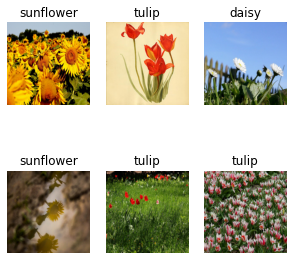

In [13]:
plt.figure(figsize=(5, 5))
for data, labels in training_ds.take(1):
  for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(data[i].numpy().astype("uint8"))
    plt.title(training_ds.class_names[labels[i]])
    plt.axis("off")

In [ ]:
# 4.Add Layers
a) Convolution layer

b) Maxpooling layer

c) Flatten

d) Hidden/dense layers

e) Output layer

In [14]:
'''a) Convolution layer'''

model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(64,64,3)))


'''b) Maxpooling layer'''

model.add(MaxPooling2D(pool_size = (2,2)))

'''c) Flatten'''

model.add(Flatten())


'''d) Hidden/dense layers'''

model.add(Dense(300, activation = "relu"))
model.add(Dense(150, activation = "relu"))


'''e) Output layer'''

model.add(Dense(5, activation = "softmax"))

In [ ]:
# 5. Compiling Model

In [15]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# 6.Fit the Model

In [28]:
model.fit(x_train, epochs = 30, steps_per_epoch = len(x_train))

Epoch 1/30
44/44 [==============================] - 15s 334ms/step - loss: 0.7581 - accuracy: 0.7070
Epoch 2/30
44/44 [==============================] - 14s 325ms/step - loss: 0.7046 - accuracy: 0.7369
Epoch 3/30
44/44 [==============================] - 16s 357ms/step - loss: 0.6577 - accuracy: 0.7484
Epoch 4/30
44/44 [==============================] - 15s 345ms/step - loss: 0.6315 - accuracy: 0.7561
Epoch 5/30
44/44 [==============================] - 14s 326ms/step - loss: 0.6340 - accuracy: 0.7575
Epoch 6/30
44/44 [==============================] - 14s 322ms/step - loss: 0.5995 - accuracy: 0.7762
Epoch 7/30
44/44 [==============================] - 15s 351ms/step - loss: 0.5780 - accuracy: 0.7836
Epoch 8/30
44/44 [==============================] - 14s 322ms/step - loss: 0.5855 - accuracy: 0.7811
Epoch 9/30
44/44 [==============================] - 14s 321ms/step - loss: 0.5666 - accuracy: 0.7846
Epoch 10/30
44/44 [==============================] - 14s 321ms/step - loss: 0.5625 - accura

In [ ]:
# 7. Save The Model

In [29]:
model.save("flowers.h1")

In [ ]:
# 8. Test the Model

In [30]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model = load_model("/content/flowers.h1")


In [21]:
daisy_img = image.load_img('/content/flowers/sunflower/40410814_fba3837226_n.jpg',target_size=(64,64))
x = image.img_to_array(daisy_img)
x = np.expand_dims(x,axis=0)
predicted_class=model.predict(x)
labels = ['daisy','dandelion','roses','sunflowers','tulips']
labels[np.argmax(predicted_class)]

1/1 [==============================] - 0s 15ms/step


'sunflowers'

In [22]:
daisy_img = image.load_img('/content/flowers/tulip/132538272_63658146d9_n.jpg',target_size=(64,64))
x = image.img_to_array(daisy_img)
x = np.expand_dims(x,axis=0)
predicted_class=model.predict(x)
labels = ['daisy','dandelion','roses','sunflowers','tulips']
labels[np.argmax(predicted_class)]

1/1 [==============================] - 0s 16ms/step


'tulips'

In [23]:
daisy_img = image.load_img('/content/flowers/rose/160954292_6c2b4fda65_n.jpg',target_size=(64,64))
x = image.img_to_array(daisy_img)
x = np.expand_dims(x,axis=0)
predicted_class=model.predict(x)
labels = ['daisy','dandelion','roses','sunflowers','tulips']
labels[np.argmax(predicted_class)]

1/1 [==============================] - 0s 15ms/step


'roses'